In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime
import plotly.figure_factory as ff
from google.colab import files
from scipy.stats import norm

# Loading the data from GDrive

In [3]:
pwd

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Walmart

/content/gdrive/MyDrive/Colab Notebooks/Walmart


In [6]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/Walmart'

In [7]:
!ls

features.csv	      Scenario1.csv  test.csv
sampleSubmission.csv  stores.csv     train.csv


In [8]:
raw_features=pd.read_csv("features.csv")
raw_stores=pd.read_csv("stores.csv")
raw_data=pd.read_csv("train.csv")

# Understanding the Data and getting an impression on what we are actually working with

In [96]:
print(raw_features.shape)
print(raw_stores.shape)
print(raw_data.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [97]:
raw_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [98]:
raw_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [99]:
raw_features.isna().sum().sort_values(ascending=True)

Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64

In [100]:
#so as we can see that the dataset containg stores data and training dataset are clean without NA.. 
#So lets proceed with the features dataset 
# Things that we know from the dataset provider about the features dataset and Initial Impressions
# 1) Duration of the dataset is from 2010-02-05 to 2012-11-01 (5th Feb 2010 - 1st November 2012 )
# 2) We have also been told by walmart that the markdown values have been only recorded after November 2011
# 3) Also have been informed that not all stores have markdowns at the same time 
# 4) The above two point explains the huge number of Null Values for Markdowns as 
#    the timeframe for which markdowns have not been recorded at all is almost half the duration of the dataset given to us.. on top of those we have 3rd point
# Lets come to markdown after dealing with other NA's
# 5) So essesntialy the missing data is from CPI and Unemployment
#
#

In [101]:
raw_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [102]:
#Immediately the things that can be observed from the above describe function are : 
# There are negative values for markdowns M1,M2,M3,M5 which usually should be positive and thus have to be tweaked and has to be check 
#  lets try to visualize the cpi distribution and Unemployment distribution

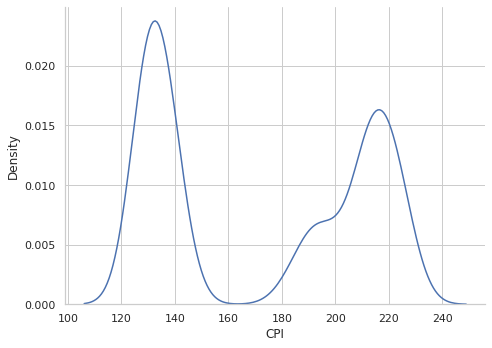

In [103]:
sns.displot(
    data=raw_features,
    x="CPI", 
    kind="kde",
    aspect=1.4,
   
    
)

In [104]:
# Imputing mean values for cpi can change the distribution of the dataset as CPI is not distributed normally 

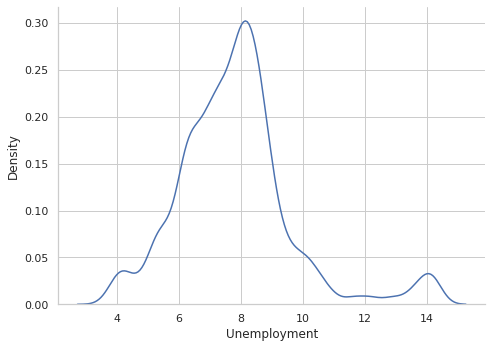

In [105]:
sns.displot(
    data=raw_features,
    x="Unemployment", 
    kind="kde",
    aspect=1.4,
    
)

In [106]:
print("Mean :",raw_features["CPI"].mean())
print("Median :",raw_features["CPI"].median())
print("Mode :",raw_features["CPI"].mode())

Mean : 172.46080918276078
Median : 182.7640032
Mode : 0    132.716097
dtype: float64


In [107]:
print("Mean :",raw_features["Unemployment"].mean())
print("Median :",raw_features["Unemployment"].median())
print("Mode :",raw_features["Unemployment"].mode())

Mean : 7.826821038790305
Median : 7.806
Mode : 0    8.099
dtype: float64


In [108]:
"""sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["Unemployment"])"""

'sns.set_theme(style="whitegrid")\nax = sns.boxplot(x=raw_features["Unemployment"])'

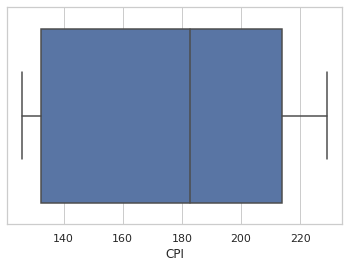

In [109]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["CPI"])

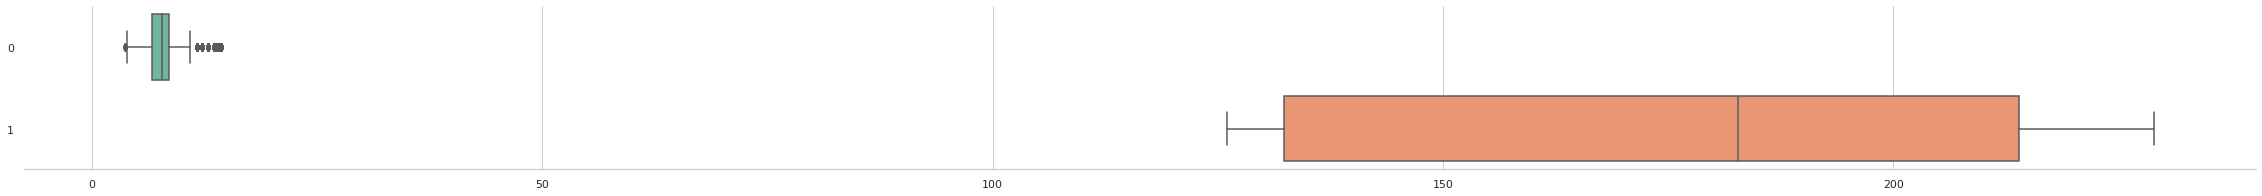

In [110]:
fig, ax = plt.subplots(figsize=(40, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax = sns.boxplot(data=[raw_features["Unemployment"],raw_features["CPI"]], orient="h", palette="Set2")
plt.show()

In [111]:
raw_features[(raw_features['CPI'].isnull())&(raw_features['Unemployment'].isnull())]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [112]:
#from the above we can see that all the missing values of CPI and Unemployment are from the same rows 
# where there is NA data when compared between CPI and Unemployment = 585 rows which is the same as the amount of missing values of CPI and Unemployment
# So What we will be doing for now is having two different approach and those would be :
# First one would be removing the NA values as the number of rows we would be losing would be a pretty acceptable loss of data (7.14 % of the data would be removed) without skewing the data 
# Second one would be imputing the values , Unemployment would take a median , CPI since it being bimodal distribution have to be imputed 

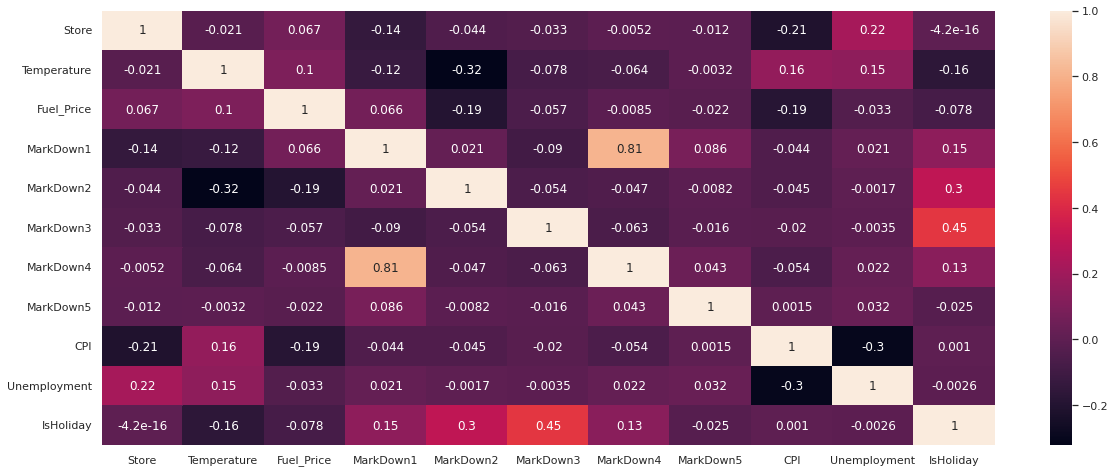

In [113]:
fig, xl = plt.subplots(figsize=(20, 8))
xl=sns.heatmap(raw_features.corr(),annot=True)
plt.show()

In [114]:
"""fig, ax = plt.subplots(figsize=(20, 8))
ax=sns.heatmap(features_scenario1.corr(),annot=True)
plt.show()"""

'fig, ax = plt.subplots(figsize=(20, 8))\nax=sns.heatmap(features_scenario1.corr(),annot=True)\nplt.show()'

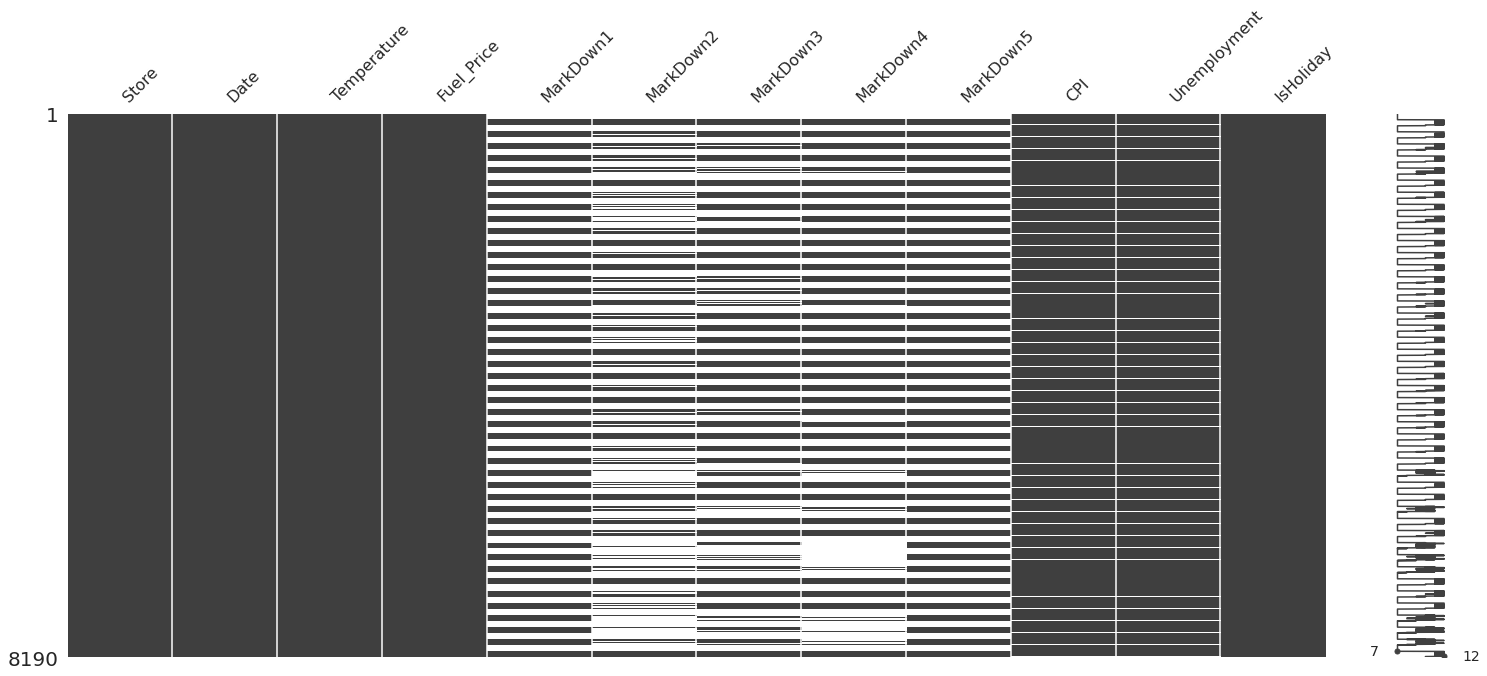

In [115]:
msno.matrix(raw_features)


In [116]:
# from the above visualization we can actually see that CPI and Unemployment have been missing at the same exact rows thus leading us to remove them, due to a very minor loss of data
features_drop=raw_features.dropna(subset=["CPI"])

In [117]:
features_drop.shape

(7605, 12)

In [118]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         7605 non-null   int64  
 1   Date          7605 non-null   object 
 2   Temperature   7605 non-null   float64
 3   Fuel_Price    7605 non-null   float64
 4   MarkDown1     3449 non-null   float64
 5   MarkDown2     2441 non-null   float64
 6   MarkDown3     3084 non-null   float64
 7   MarkDown4     2974 non-null   float64
 8   MarkDown5     3465 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     7605 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 720.4+ KB


In [119]:
features_drop["Date"]=pd.to_datetime(features_drop["Date"])

In [120]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         7605 non-null   int64         
 1   Date          7605 non-null   datetime64[ns]
 2   Temperature   7605 non-null   float64       
 3   Fuel_Price    7605 non-null   float64       
 4   MarkDown1     3449 non-null   float64       
 5   MarkDown2     2441 non-null   float64       
 6   MarkDown3     3084 non-null   float64       
 7   MarkDown4     2974 non-null   float64       
 8   MarkDown5     3465 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     7605 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 720.4 KB


In [121]:
split_date = '2011-11-25 23:00:00'


In [122]:
type(split_date)

str

In [123]:
df_training = features_drop.loc[features_drop['Date'] <= split_date]
df_test = features_drop.loc[features_drop['Date'] > split_date]

In [124]:
df_test.shape

(3330, 12)

In [125]:
df_test.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,1,2011-12-16,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,1,2011-12-23,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False
99,1,2011-12-30,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,True
...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,2012-04-27,67.20,3.814,3076.68,NaN,38.32,108.71,2708.90,221.255812,6.891,False
299,2,2012-05-04,76.73,3.749,23731.47,NaN,78.09,7931.42,4443.52,221.309517,6.891,False
300,2,2012-05-11,73.87,3.688,16519.50,NaN,117.38,5131.02,3634.25,221.363221,6.891,False
301,2,2012-05-18,71.27,3.630,9262.12,NaN,42.67,3694.80,4612.01,221.380331,6.891,False


In [126]:
features_scenario1=df_test

In [127]:
4275+3330

7605

In [128]:
features_drop.shape

(7605, 12)

In [129]:
features_scenario1.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1         15
MarkDown2       1013
MarkDown3        370
MarkDown4        466
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [130]:
raw_features_merge_with_store=raw_features.merge(raw_stores,how="inner",on="Store")

In [131]:
raw_features_merge_with_store.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [132]:
featuresdrop_merge_with_store=features_drop.merge(raw_stores,how="inner",on="Store")

In [133]:
featuresdrop_merge_with_store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,7605.000000,7605.000000,7605.000000,3449.000000,2441.000000,3084.000000,2974.000000,3465.000000,7605.000000,7605.000000,7605.00000
mean,23.000000,58.297325,3.389624,7346.686886,3918.187853,2026.774066,3349.993410,4257.267299,172.460809,7.826821,130287.60000
std,12.988027,18.709862,0.441461,9724.747757,9522.212782,12185.103596,7180.599985,14050.353680,39.738346,1.877259,63116.26787
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.00000
25%,12.000000,44.720000,3.001000,1673.310000,57.960000,5.735000,282.730000,1472.860000,132.364839,6.634000,70713.00000
50%,23.000000,59.250000,3.494000,4879.580000,345.500000,30.370000,1108.435000,2772.050000,182.764003,7.806000,126512.00000
75%,34.000000,72.620000,3.742000,9264.480000,3128.740000,137.517500,3162.400000,4893.310000,213.932412,8.567000,202307.00000
max,45.000000,100.140000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.00000


In [134]:
featuresdrop_merge_with_store['MarkDown1'] = featuresdrop_merge_with_store['MarkDown1'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown2'] = featuresdrop_merge_with_store['MarkDown2'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown3'] = featuresdrop_merge_with_store['MarkDown3'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown4'] = featuresdrop_merge_with_store['MarkDown4'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown5'] = featuresdrop_merge_with_store['MarkDown5'].replace(np.nan, 0)

In [135]:
features_scenario_dropand0=featuresdrop_merge_with_store

In [136]:
featuresdrop_merge_with_store.shape


(7605, 14)

In [137]:
print("Shape of stores data Set: ",raw_stores.shape)
print("Shape of features data Set: ",features_drop.shape)
print("Shape of data data Set: ",raw_data.shape)

Shape of stores data Set:  (45, 3)
Shape of features data Set:  (7605, 12)
Shape of data data Set:  (421570, 5)


In [138]:
print("Shape of merged data",featuresdrop_merge_with_store.shape)

Shape of merged data (7605, 14)


In [139]:
#This is the scenario where CPI and Unemployment Null values have been dropped and nas have been converted to 0 for markdown
features_scenario_dropand0.shape 

(7605, 14)

In [140]:
#lets check how the train dataset is like 

In [141]:
raw_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [142]:
raw_data.shape

(421570, 5)

In [143]:
# by above description  we can see that the data we have in the training file is for weekly sales 
# lets merge the data set with the processesd features dataset  

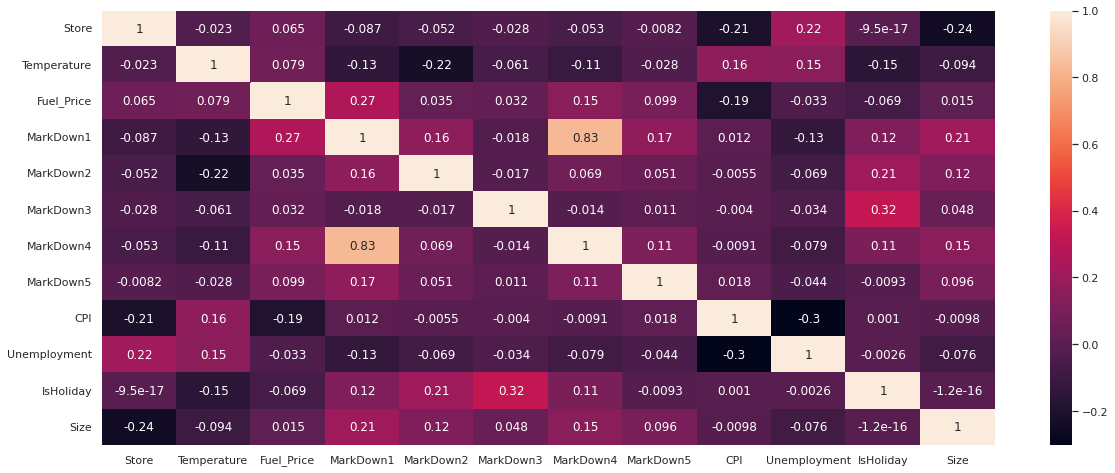

In [144]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(features_scenario_dropand0.corr(),annot=True)
plt.show()

In [145]:
#As we have already have one dataset in a datetime format for "date" feature we are converting the other one to datetime format too !!

raw_data["Date"]=pd.to_datetime(raw_data["Date"])

In [146]:
df1=raw_data.merge(features_scenario_dropand0,on=['Store','IsHoliday','Date'],how='inner')

In [147]:
print("Shape of Merged data Set: Inner",df1.shape)

Shape of Merged data Set: Inner (421570, 16)


In [148]:
df1.to_csv("Scenario1.csv")
files.download('Scenario1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
df1.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [150]:
df1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [151]:
df1.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [152]:
#from the above we can find two anamolies that there are min values with -ve values for the features named "Weekly Sales","MarkDown2", "MarkDown3"

In [153]:
df1[(df1['Weekly_Sales'] < 0)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,A,151315
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,0.00,0.00,0.00,0.00,0.00,215.074394,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,B,118221
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221


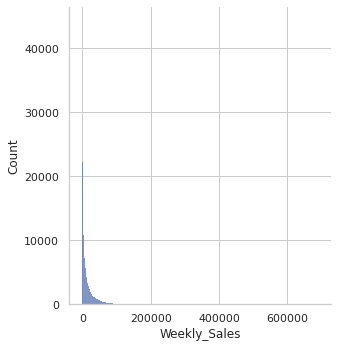

In [154]:
#So to correct this lets check the distribution of weekly sales to get an understanding of how to impute the -ve values
sns.displot(df1['Weekly_Sales'])

In [155]:
outlier_max=df1["Weekly_Sales"].quantile(0.95)

In [156]:
outlier_min=df1["Weekly_Sales"].quantile(0.05)


In [157]:
outlier_min

59.974500000000006

In [158]:
df1.shape

(421570, 16)

In [159]:
df1.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [180]:
#RemoveAnomalies
df111=df1[(df1["Weekly_Sales"]>0)]         
df111.shape

(420212, 16)

In [183]:
df111=df111[(df111["MarkDown2"]>=0)]  
df111.shape 

(418910, 16)

In [185]:
df111=df111[(df111["MarkDown3"]>=0)]  
df111.shape 

(418654, 16)

In [187]:
#After Removing the anamolies
df111.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000
mean,22.197354,44.242241,16028.664965,60.052348,3.359308,2575.945153,882.156489,470.476283,1080.156246,1654.468456,171.202468,7.961483,136684.968430
std,12.790526,30.510172,22726.308043,18.454874,0.458387,6056.919377,5086.078731,5544.292474,3901.826427,4207.467593,39.158998,1.864320,61010.768249
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2118.287500,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.405000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20267.445000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,2146.940000,212.412888,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [169]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [163]:
df11=df1[(df1["Weekly_Sales"]<outlier_max) & (df1["Weekly_Sales"]>outlier_min)]

In [164]:
df11.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000
mean,22.099649,43.008221,12772.788110,59.907980,3.359936,2597.876727,884.764318,457.445892,1082.140291,1651.734646,171.384283,7.955339,136806.898203
std,12.714089,30.180710,13820.034321,18.457643,0.458989,6041.121725,5073.617672,5422.571084,3881.167694,4157.208046,39.097377,1.864337,60120.237747
min,1.000000,1.000000,59.980000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,17.000000,2488.280000,46.540000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.885000,93638.000000
50%,22.000000,35.000000,7612.030000,61.900000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.544590,7.866000,140167.000000
75%,32.000000,72.000000,18295.685000,74.150000,3.738000,2920.430000,2.650000,4.460000,445.470000,2169.340000,212.571112,8.567000,202505.000000
max,45.000000,99.000000,61201.830000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


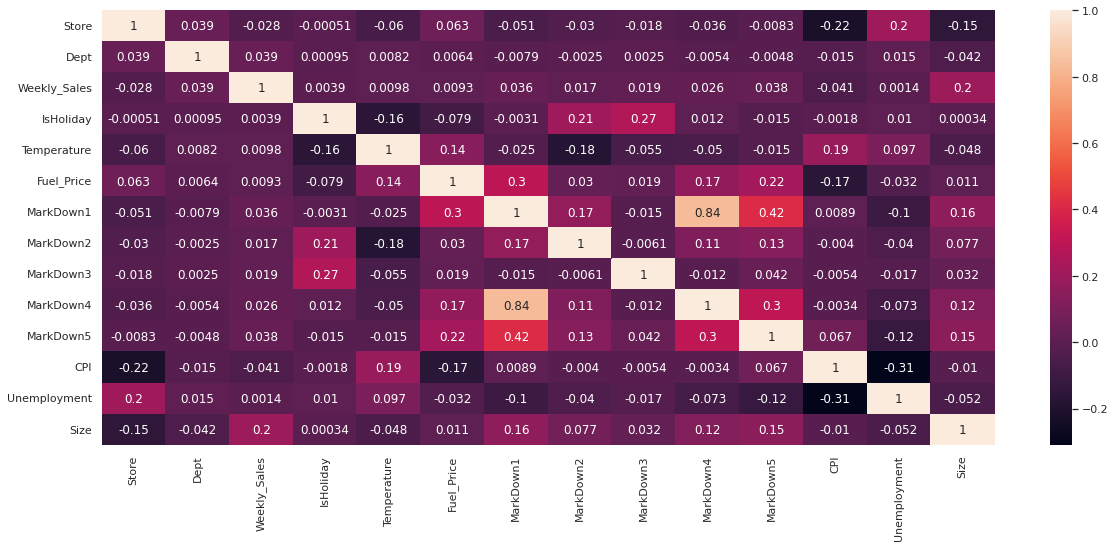

In [165]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(df11.corr(),annot=True)
plt.show()

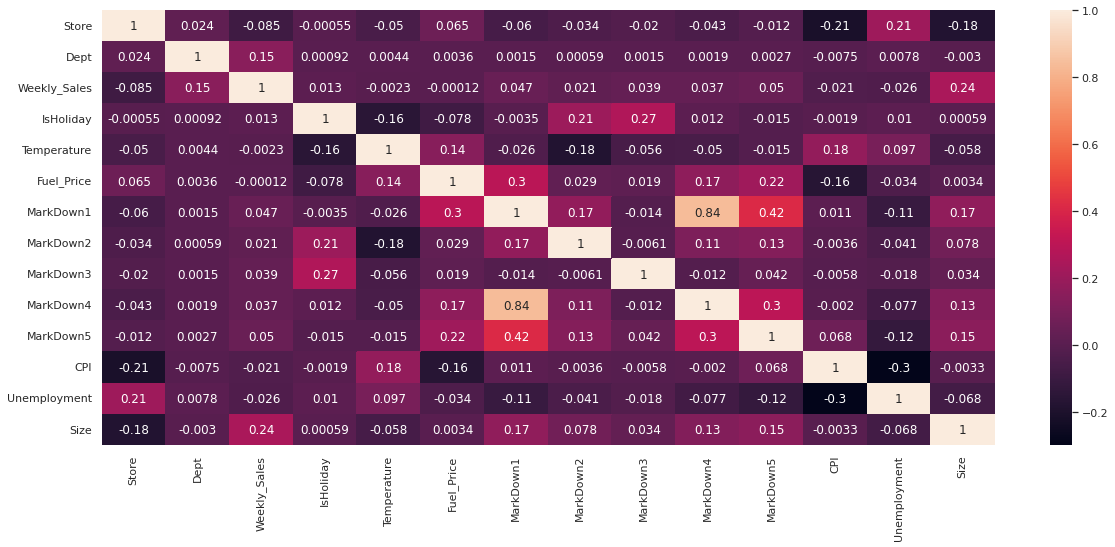

In [166]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(df1.corr(),annot=True)
plt.show()